In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm # statsmodel 기본 import
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk
from patsy import dmatrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


##### 비선형 데이터

In [2]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

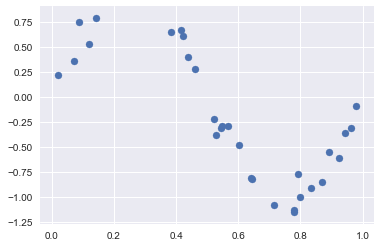

In [3]:
X, y = make_nonlinear()
plt.scatter(X, y)
plt.show()

##### StatsModels를 이용한 다항 회귀

In [4]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=['y'])
df = pd.concat([dfX, dfy], axis=1)

In [5]:
print(sm.OLS.from_formula("y~x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           1.69e-06
Time:                        20:52:42   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

In [6]:
print(sm.OLS.from_formula("y~x+I(x**2)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     18.38
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           9.14e-06
Time:                        20:54:03   Log-Likelihood:                -14.953
No. Observations:                  30   AIC:                             35.91
Df Residuals:                      27   BIC:                             40.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8638      0.248      3.487      0.0

In [7]:
print(sm.OLS.from_formula("y~x+I(x**2) + I(x**3)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           1.06e-17
Time:                        20:54:46   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

In [8]:
def polyreg(degree, seed=0, ax=None):
    X, y = make_nonlinear(seed)
    
    dfX = pd.DataFrame(X, columns=["x"])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=["y"])
    df = pd.concat([dfX, dfy], axis=1)
    
    model_str = "y ~ "
    for i in range(degree):
        if i == 0:
            prefix = ""
        else:
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()
    
    if ax:
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("Degree={}, Seed={}".format(degree, seed))
        xlabel = "\n".join(str(result.params).split("\n")[:-1])
        font = {'family': 'NanumGothicCoding', 'color':  'black', 'size': 10}
        ax.set_xlabel(xlabel, fontdict=font)
    
    return result

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


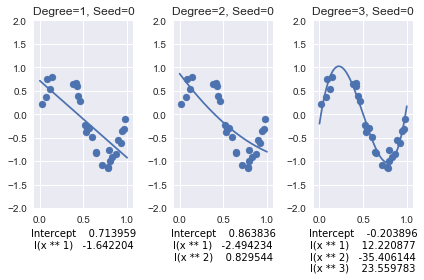

In [10]:
ax1 = plt.subplot(131)
polyreg(1, ax=ax1)

ax2 = plt.subplot(132)
polyreg(2, ax=ax2)

ax3 = plt.subplot(133)
polyreg(3, ax=ax3)

plt.tight_layout()
plt.show()

##### 과최적화

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


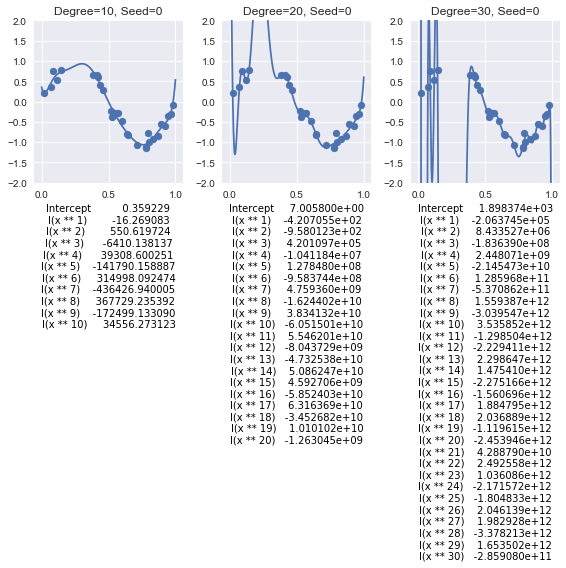

In [12]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(10, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, ax=ax2)
ax3 = plt.subplot(133)
polyreg(30, ax=ax3)

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


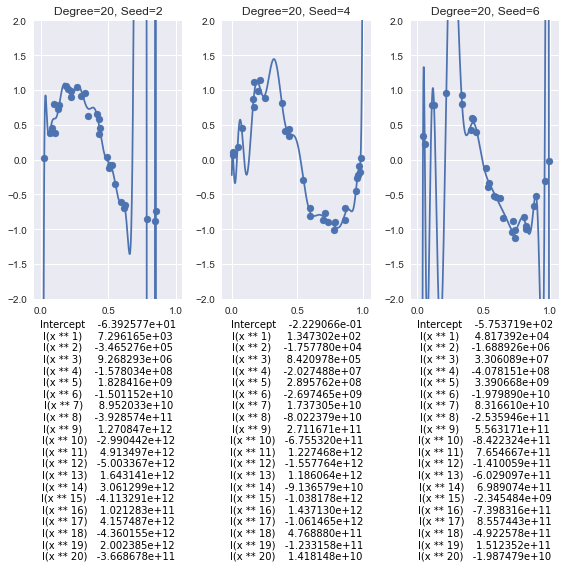

In [13]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)
ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)
plt.tight_layout()
plt.show()